In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TP', parse_dates=True, index_col=['Date'])

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-15,83.800003,82.150002,82.550003,83.550003,2007841.0,71.511093
2017-05-16,85.949997,83.400002,83.900002,83.849998,5141578.0,71.767860
2017-05-17,86.000000,83.599998,84.000000,85.349998,5499293.0,73.051727
2017-05-18,85.599998,83.500000,84.750000,83.750000,2296399.0,71.682281
2017-05-19,85.449997,83.050003,84.400002,84.150002,6222693.0,72.024635


In [4]:
data = df.filter(['Close'])

In [5]:
# Converting data frame into nparray
dataset = data.values
# Geting the number of rows to train rhe model on
training_data_len = int(np.ceil(len(dataset)*0.95))

training_data_len


1175

In [6]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler(feature_range=(0,1))
scaled_data  = scaler.fit_transform(dataset)
scaled_data

array([[0.21428574],
       [0.21542858],
       [0.22114286],
       ...,
       [0.75885718],
       [0.73047624],
       [0.74476195]])

In [7]:
# creating the training dataset 
# create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the  data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.21428574, 0.21542858, 0.22114286, 0.21504763, 0.21657145,
       0.20857145, 0.20266668, 0.2017143 , 0.20228573, 0.20476193,
       0.20514287, 0.20990478, 0.20457144, 0.20342857, 0.20476193,
       0.20457144, 0.1992381 , 0.20076192, 0.19714288, 0.19238098,
       0.19657145, 0.19352382, 0.19142859, 0.18971429, 0.19276192,
       0.19333336, 0.20876191, 0.20742858, 0.21123811, 0.2064762 ,
       0.20495239, 0.20704764, 0.20666669, 0.20285717, 0.20228573,
       0.20533333, 0.20742858, 0.20819048, 0.2072381 , 0.21390476,
       0.21219049, 0.21238098, 0.21314287, 0.212     , 0.2137143 ,
       0.21009524, 0.212     , 0.21180954, 0.21352382, 0.21314287,
       0.21219049, 0.21047621, 0.20838096, 0.2089524 , 0.20838096,
       0.2114286 , 0.21066667, 0.21085716, 0.2017143 , 0.20076192])]
[array([0.19409525])]

[array([0.21428574, 0.21542858, 0.22114286, 0.21504763, 0.21657145,
       0.20857145, 0.20266668, 0.2017143 , 0.20228573, 0.20476193,
       0.20514287, 0.20990478, 0.20

(1115, 60, 1)

In [8]:
# Building the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
# intailizing the RNN
model = Sequential()

In [10]:
model.add(LSTM(128,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model 
model.compile(optimizer = 'adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1115/1115 [==============================] - 33s 27ms/step - loss: 0.0020
Epoch 2/10
1115/1115 [==============================] - 39s 35ms/step - loss: 9.1871e-04
Epoch 3/10
1115/1115 [==============================] - 39s 35ms/step - loss: 6.1706e-04
Epoch 4/10
1115/1115 [==============================] - 39s 35ms/step - loss: 0.0011
Epoch 5/10
1115/1115 [==============================] - 39s 35ms/step - loss: 7.6466e-04
Epoch 6/10
1115/1115 [==============================] - 39s 35ms/step - loss: 3.8096e-04
Epoch 7/10
1115/1115 [==============================] - 38s 34ms/step - loss: 4.5013e-04
Epoch 8/10
1115/1115 [==============================] - 38s 34ms/step - loss: 4.0202e-04
Epoch 9/10
1115/1115 [==============================] - 39s 35ms/step - loss: 5.4929e-04
Epoch 10/10
1115/1115 [==============================] - 38s 34ms/step - loss: 3.3862e-04


In [22]:
# creating the testing data set
test_data = scaled_data[training_data_len-60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# converting the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean square error
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

7.54050848292274

C:\Users\HARDIK\AppData\Local\Temp/ipykernel_2420/4282045915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


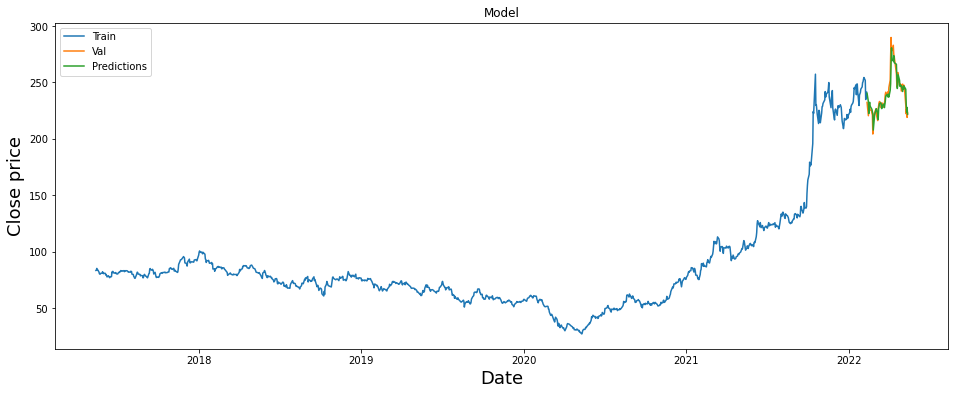

In [24]:
# Plot Data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visulaizing the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='best')
plt.show()

In [25]:
valid

,Close,predictions
Date,,
2022-02-11,232.300003,240.384460
2022-02-14,220.500000,232.893463
2022-02-15,230.399994,222.477707
2022-02-16,231.350006,230.969833
2022-02-17,227.750000,232.371597
...,...,...
2022-05-09,230.000000,244.016663
2022-05-10,222.149994,230.844574
2022-05-11,226.500000,223.779266
